In [14]:
import numpy as np
import scipy as p
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData


In [17]:
np.random.seed(1) 
n_samples = 1000
x_true = np.linspace(-1, 1, num=n_samples)

def f(x):
    return 1 + 3*x + x**2 + x**3 

noise = np.random.normal(loc=0, scale=1, size=n_samples)

y_noisy = f(x_true) + noise

def linear_poly_model(beta, x):
    return beta[0] + beta[1]*x**1 + beta[2]*x**2 + beta[3]*x**3

model = Model(linear_poly_model)
data = RealData(x_true, y_noisy)
beta0 = [1, 1, 1, 1] # set initial parameters

odr = ODR(data, model, beta0=beta0)
output = odr.run()
print("fit the parameters")
for i, b in enumerate(output.beta):
    print(f"beta[{i}] = {b:.4f}")

y_fit1 = linear_poly_model(output.beta, x_true)


fit the parameters
beta[0] = 1.2624
beta[1] = 3.3138
beta[2] = 0.2450
beta[3] = 2.0235



Fit parameters (x and y noise):
beta[0] = 1.1674
beta[1] = 3.4842
beta[2] = 0.8905
beta[3] = 0.9113


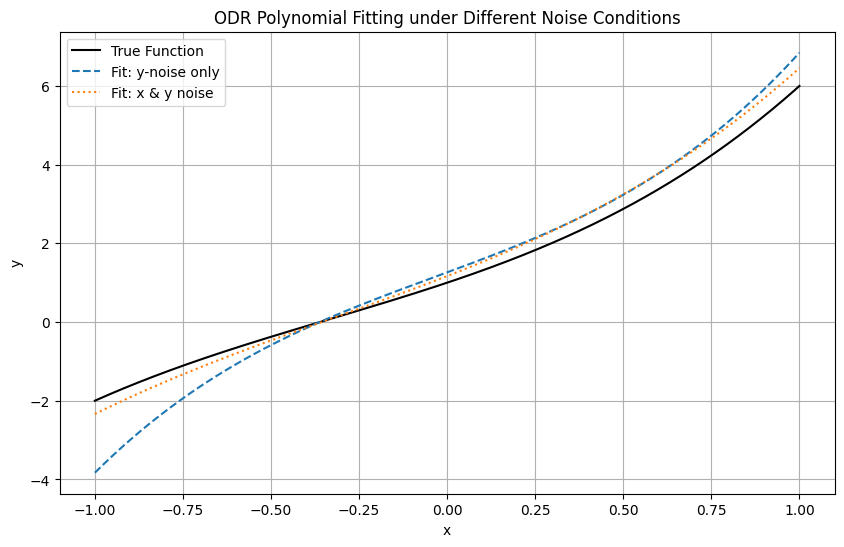

In [18]:
x_noisy = x_true + np.random.normal(0, 1, size=n_samples)
y_noisy2 = f(x_noisy) + noise  # noise is reused here, which is fine

data2 = RealData(x_noisy, y_noisy2)
beta0 = [1, 1, 1, 1]
odr2 = ODR(data2, model, beta0=beta0)
output2 = odr2.run()

print("\nFit parameters (x and y noise):")
for i, b in enumerate(output2.beta):
    print(f"beta[{i}] = {b:.4f}")

y_fit2 = linear_poly_model(output2.beta, x_true)

plt.figure(figsize=(10, 6))
plt.plot(x_true, f(x_true), label="True Function", color="black")
plt.plot(x_true, y_fit1, label="Fit: y-noise only", linestyle="--")
plt.plot(x_true, y_fit2, label="Fit: x & y noise", linestyle=":")
plt.legend()
plt.title("ODR Polynomial Fitting under Different Noise Conditions")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()